In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [65]:
keV11 = pd.read_csv("Xray/11keV",delimiter="\t")
keV12 = pd.read_csv("Xray/12keV",delimiter="\t")
keV13 = pd.read_csv("Xray/13keV",delimiter="\t")
keV14 = pd.read_csv("Xray/14keV",delimiter="\t")
keV15 = pd.read_csv("Xray/15keV",delimiter="\t")

datakeV11 = np.hstack((np.reshape(keV11["z (nm)"].to_numpy(),(len(keV11["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV11["PRZ(pz) Emi"].to_numpy(),(len(keV11["PRZ(pz) Emi"].to_numpy()),1))))
datakeV12 = np.hstack((np.reshape(keV12["z (nm)"].to_numpy(),(len(keV12["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV12["PRZ(pz) Emi"].to_numpy(),(len(keV12["PRZ(pz) Emi"].to_numpy()),1))))
datakeV13 = np.hstack((np.reshape(keV13["z (nm)"].to_numpy(),(len(keV13["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV13["PRZ(pz) Emi"].to_numpy(),(len(keV13["PRZ(pz) Emi"].to_numpy()),1))))
datakeV14 = np.hstack((np.reshape(keV14["z (nm)"].to_numpy(),(len(keV14["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV14["PRZ(pz) Emi"].to_numpy(),(len(keV14["PRZ(pz) Emi"].to_numpy()),1))))
datakeV15 = np.hstack((np.reshape(keV15["z (nm)"].to_numpy(),(len(keV15["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV15["PRZ(pz) Emi"].to_numpy(),(len(keV15["PRZ(pz) Emi"].to_numpy()),1))))


In [115]:
def find_nearest(array, value):
    # Function for finding closest value in array
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def find_nearest_id(array, value):
    # Function for finding closest value in array
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def integration(data,zmax,phi=35,rho=2,mu=0.01):
    z = data[:,0]
    y = data[:,1]#*np.exp(-(mu/rho)*np.sin(phi*rho*z)**-1)
    zmax_id = find_nearest_id(z,zmax)
    # print(y)
    
    integral = np.sum(np.reshape(y[:zmax_id],-1))
    
    return integral,z[zmax_id]

def thicknesstrend(data,z):
    zstops = np.linspace(0,z,z)
    k1 = np.array([])
    zta = np.array([])
    sak = 0
    for i in zstops:
        gral, zte = integration(data,i)
        if gral!=sak:
            k1 = np.append(k1,gral)
            zta = np.append(zta,zte)
        elif i==0:
            k1 = np.append(k1,gral)
            zta = np.append(zta,zte)
        sak = gral

    k1 = k1/np.max(k1)
    dataut = np.hstack((np.array([zta]).T,np.array([k1]).T))
    return dataut
    

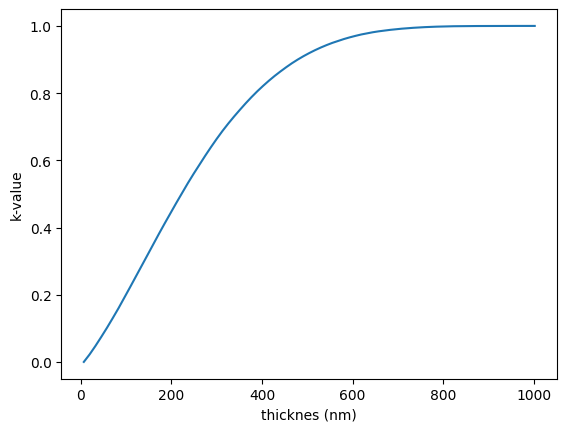

In [55]:
k2 = np.array([])

zstops = np.linspace(0,1000,1000)
ztb = np.array([])

datakeV11 = np.hstack((np.reshape(keV11["z (nm)"].to_numpy(),(len(keV11["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV11["PRZ(pz) Emi"].to_numpy(),(len(keV11["PRZ(pz) Emi"].to_numpy()),1))))

for i in zstops:
    gral, zte = integration(datakeV11,i)
    k2 = np.append(k2,gral)
    ztb = np.append(ztb,zte)

k2 = k2/np.max(k2)
c11 = np.polyfit(ztb[200:250],k2[200:250],1)
plt.plot(ztb,k2)
# plt.plot(zta[:400],c11[0]*zta[:400]+c11[1])
plt.xlabel("thicknes (nm)")
plt.ylabel("k-value")
plt.show()
    

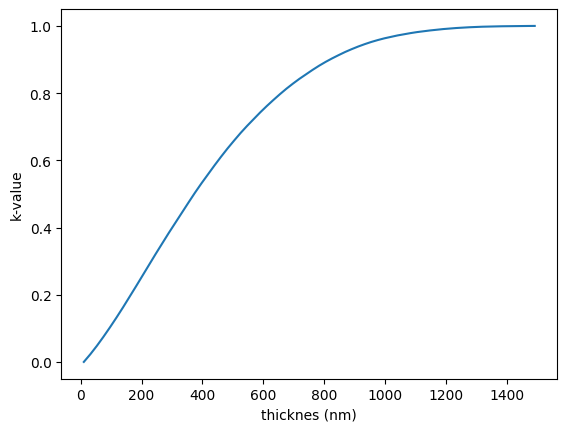

In [102]:
k1 = np.array([])

zstops = np.linspace(0,1500,1500)
zta = np.array([])

datakeV15 = np.hstack((np.reshape(keV15["z (nm)"].to_numpy(),(len(keV15["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV15["PRZ(pz) Emi"].to_numpy(),(len(keV15["PRZ(pz) Emi"].to_numpy()),1))))

for i in zstops:
    gral, zte = integration(datakeV15,i)
    k1 = np.append(k1,gral)
    zta = np.append(zta,zte)

k1 = k1/np.max(k1)
c15 = np.polyfit(zta[200:250],k1[200:250],1)
plt.plot(zta,k1)
# plt.plot(zta[:400],c15[0]*zta[:400]+c15[1])
plt.xlabel("thicknes (nm)")
plt.ylabel("k-value")
# plt.xlim((0,1000))
# plt.ylim((0,70))
plt.show()
    

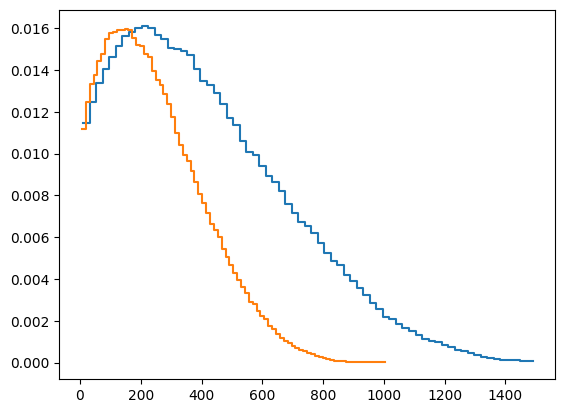

In [60]:
dk1 = np.gradient(k1)
dk2 = np.gradient(k2)

plt.plot(zta[dk1!=0],dk1[dk1!=0])
plt.plot(ztb[dk2!=0],dk2[dk2!=0])
plt.show()

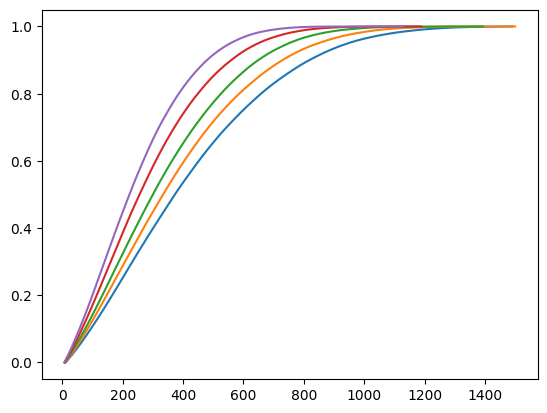

[203.668, 162.397, 160.375, 140.308, 146.876]


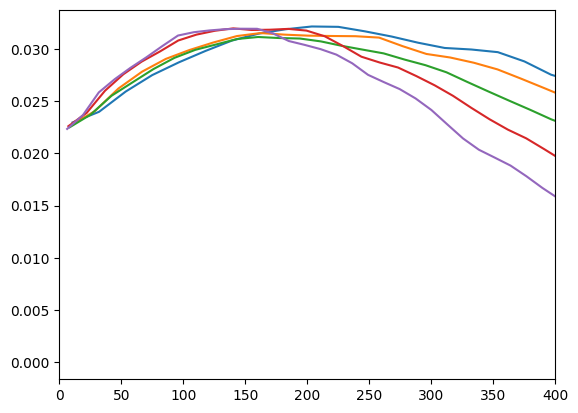

In [121]:
data15 = thicknesstrend(datakeV15,1500)
data14 = thicknesstrend(datakeV14,1500)
data13 = thicknesstrend(datakeV13,1500)
data12 = thicknesstrend(datakeV12,1500)
data11 = thicknesstrend(datakeV11,1500)

kd15 = np.gradient(data15[:,1])
kd14 = np.gradient(data14[:,1])
kd13 = np.gradient(data13[:,1])
kd12 = np.gradient(data12[:,1])
kd11 = np.gradient(data11[:,1])

plt.plot(data15[:,0],data15[:,1])
plt.plot(data14[:,0],data14[:,1])
plt.plot(data13[:,0],data13[:,1])
plt.plot(data12[:,0],data12[:,1])
plt.plot(data11[:,0],data11[:,1])
plt.show()
plt.plot(data15[:,0],kd15)
plt.plot(data14[:,0],kd14)
plt.plot(data13[:,0],kd13)
plt.plot(data12[:,0],kd12)
plt.plot(data11[:,0],kd11)
plt.xlim((0,400))
plt.plot([15,14,13,12,11],[data15[:,0][np.argmax(kd15)],data14[:,0][np.argmax(kd14)],data13[:,0][np.argmax(kd13)],data12[:,0][np.argmax(kd12)],data11[:,0][np.argmax(kd11)]])
print([data15[:,0][np.argmax(kd15)],data14[:,0][np.argmax(kd14)],data13[:,0][np.argmax(kd13)],data12[:,0][np.argmax(kd12)],data11[:,0][np.argmax(kd11)]])